In [1]:
import numpy as np

# 生成数据
X = np.atleast_2d([1.0, 3.0, 5.0, 6.0, 7.0, 8.0]).T  # 输入点，至少为二维
y = np.sin(X).ravel()  # 真实函数值

# 添加噪声
y += 0.1 * np.random.randn(y.shape[0])  # 添加随机噪声

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 定义核函数
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# 创建高斯过程回归模型
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

# 拟合数据
gpr.fit(X, y)

GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10)

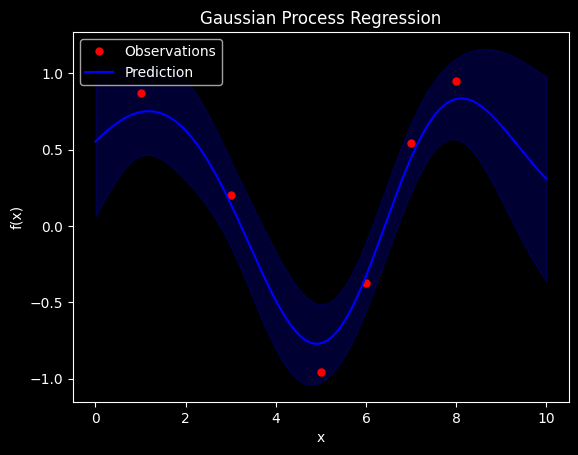

In [4]:
# 生成一些新的点来进行预测
X_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
y_pred, sigma = gpr.predict(X_pred, return_std=True)  # 预测结果及其标准差

# 绘图查看结果
import matplotlib.pyplot as plt

plt.figure()
plt.plot(X, y, "r.", markersize=10, label="Observations")  # 观测点
plt.plot(X_pred, y_pred, "b-", label="Prediction")  # 预测的函数曲线
plt.fill_between(
    X_pred[:, 0], y_pred - sigma, y_pred + sigma, color="b", alpha=0.2
)  # 不确定性区间
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gaussian Process Regression")
plt.legend()
plt.show()